
First few rows of the data:
   person_age  person_income personhomeownership  personemplength loan_intent  \
0          22          59000                RENT            123.0    PERSONAL   
1          21           9600                 OWN              5.0   EDUCATION   
2          25           9600            MORTGAGE              1.0     MEDICAL   
3          23          65500                RENT              4.0     MEDICAL   
4          24          54400                RENT              8.0     MEDICAL   

  loan_grade  loan_amnt  loanintrate  loan_status  loanpercentincome  \
0          D      35000        16.02            1               0.59   
1          B       1000        11.14            0               0.10   
2          C       5500        12.87            1               0.57   
3          C      35000        15.23            1               0.53   
4          C      35000        14.27            1               0.55   

  cbpersondefaultonfile  cbpresoncredhistlength  
0

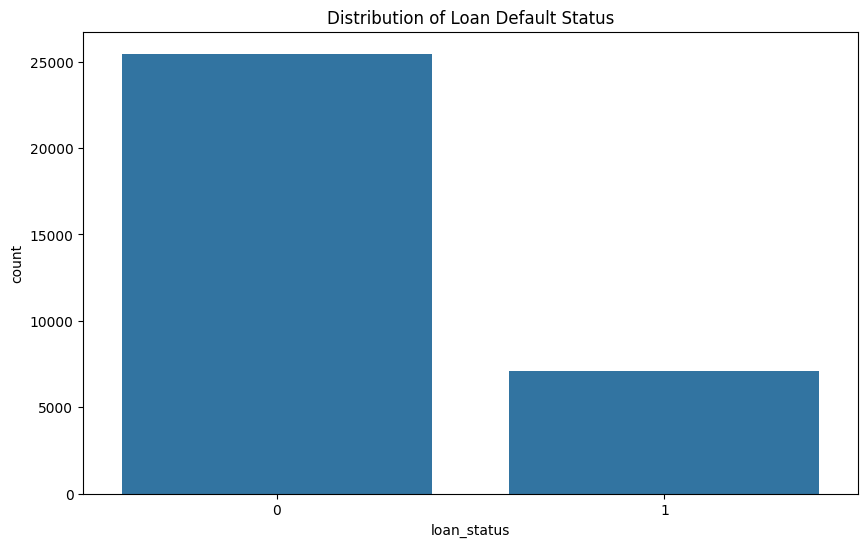

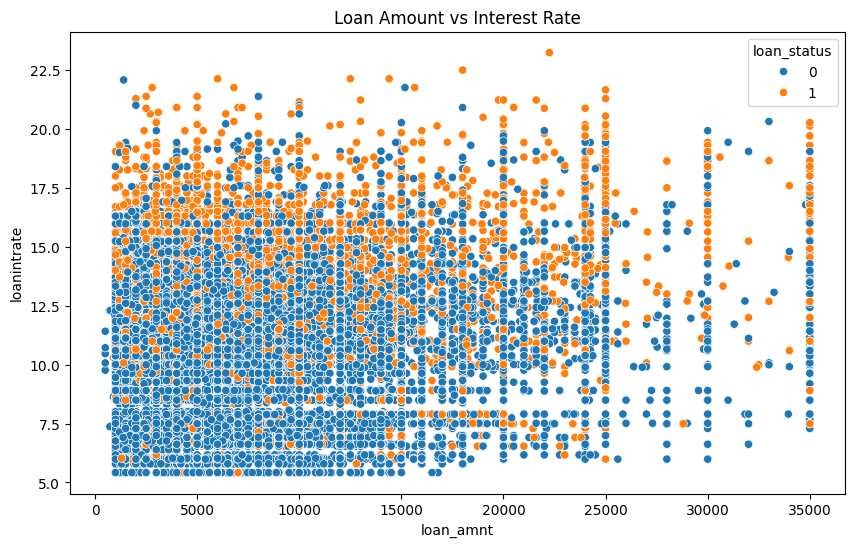

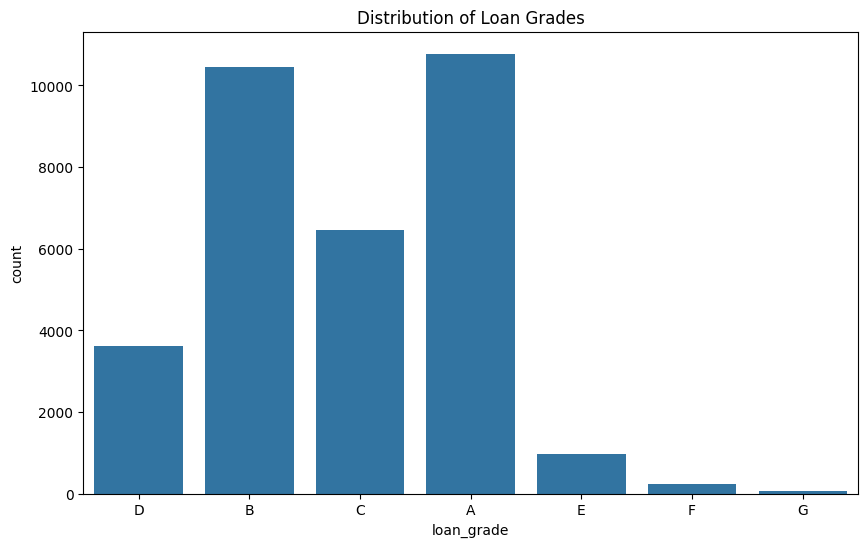

In [24]:
# Install necessary packages
!pip install pandas numpy scikit-learn seaborn matplotlib

# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
data = pd.read_csv('/content/data.csv')

# Preview the first few rows of the data
print("\nFirst few rows of the data:")
print(data.head())

# Get dataset info and check for missing values
print("\nDataset Information:")
print(data.info())
print("\nMissing Values in each column:")
print(data.isnull().sum())

# Basic stats for numerical columns
print("\nBasic statistics of numerical columns:")
print(data.describe())

# Visualize loan default status
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='loan_status')
plt.title('Distribution of Loan Default Status')
plt.show()

# Relationship between loan amount and interest rate
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='loan_amnt', y='loanintrate', hue='loan_status')
plt.title('Loan Amount vs Interest Rate')
plt.show()

# Visualize loan grades distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='loan_grade')
plt.title('Distribution of Loan Grades')
plt.show()

Creating copies of categorical columns...
Encoding categorical variables...

Encoded data preview:
   person_age  person_income  personhomeownership  personemplength  \
0          22          59000                    3            123.0   
1          21           9600                    2              5.0   
2          25           9600                    0              1.0   
3          23          65500                    3              4.0   
4          24          54400                    3              8.0   

   loan_intent  loan_grade  loan_amnt  loanintrate  loan_status  \
0            4           3      35000        16.02            1   
1            1           1       1000        11.14            0   
2            3           2       5500        12.87            1   
3            3           2      35000        15.23            1   
4            3           2      35000        14.27            1   

   loanpercentincome  cbpersondefaultonfile  cbpresoncredhistlength  
0      

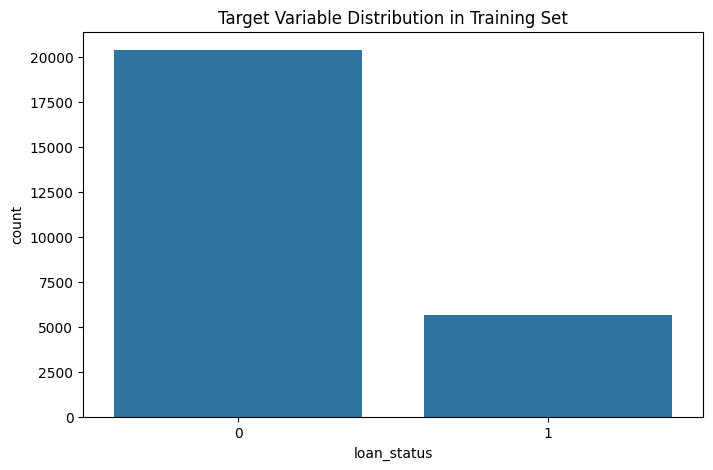

In [25]:
# Step 2: Data Preprocessing

# Import preprocessing libraries
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Create copies of categorical columns before encoding
print("Creating copies of categorical columns...")
categorical_columns = ['personhomeownership', 'loan_intent', 'loan_grade', 'cbpersondefaultonfile']
original_categorical_data = data[categorical_columns].copy()

# Convert categorical variables to numerical using LabelEncoder
print("Encoding categorical variables...")
label_encoders = {}
for column in categorical_columns:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

# Show first few rows after encoding
print("\nEncoded data preview:")
print(data.head())

# Separate features (X) and target variable (y)
print("\nSeparating features and target variable...")
X = data.drop('loan_status', axis=1)
y = data['loan_status']

print("\nFeatures:", list(X.columns))
print("Number of features:", len(X.columns))
print("Target classes:", len(y.unique()))

# Split data into training and testing sets
print("\nSplitting data into training and testing sets...")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

# Scale numerical features for better model performance
print("\nScaling numerical features...")
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert scaled data back to DataFrame to keep column names
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# Preview scaled training data
print("\nScaled training data preview:")
print(X_train_scaled.head())

# Save preprocessing objects for future use
print("\nSaving preprocessing objects...")
import pickle

preprocessing_objects = {
    'label_encoders': label_encoders,
    'scaler': scaler,
    'feature_names': list(X.columns)
}

# Save to a file
with open('preprocessing_objects.pkl', 'wb') as f:
    pickle.dump(preprocessing_objects, f)

print("\nPreprocessing complete. Data ready for model training.")

# Optional: Visualize target variable distribution in training set
plt.figure(figsize=(8, 5))
sns.countplot(x=y_train)
plt.title('Target Variable Distribution in Training Set')
plt.show()

Step 1: Training Logistic Regression Model...

Logistic Regression Results:
Accuracy: 0.8371950283872948

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.95      0.90      5072
           1       0.72      0.44      0.54      1445

    accuracy                           0.84      6517
   macro avg       0.79      0.69      0.72      6517
weighted avg       0.83      0.84      0.82      6517



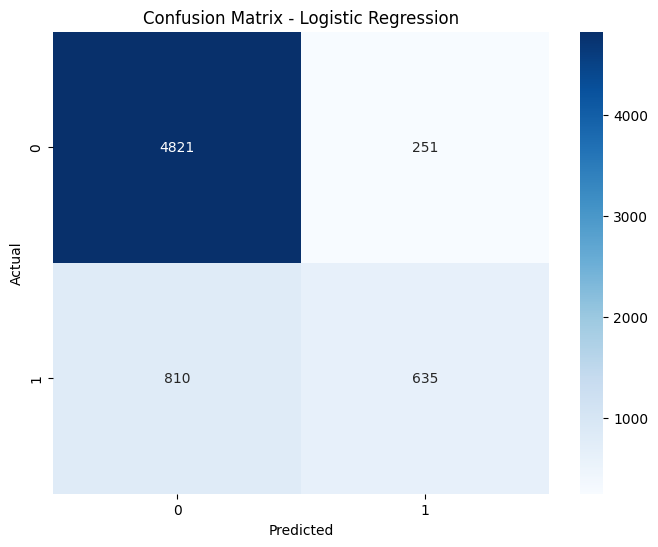


Step 2: Training Random Forest Model...

Random Forest Results:
Accuracy: 0.9294153751726254

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.99      0.96      5072
           1       0.97      0.71      0.82      1445

    accuracy                           0.93      6517
   macro avg       0.94      0.85      0.89      6517
weighted avg       0.93      0.93      0.93      6517



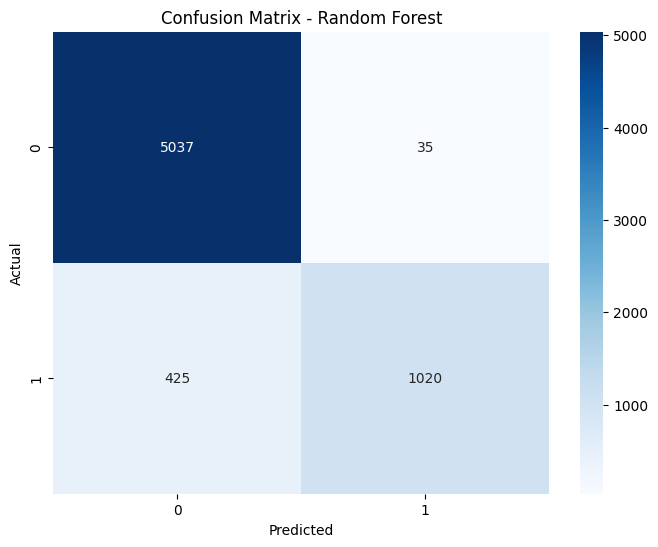

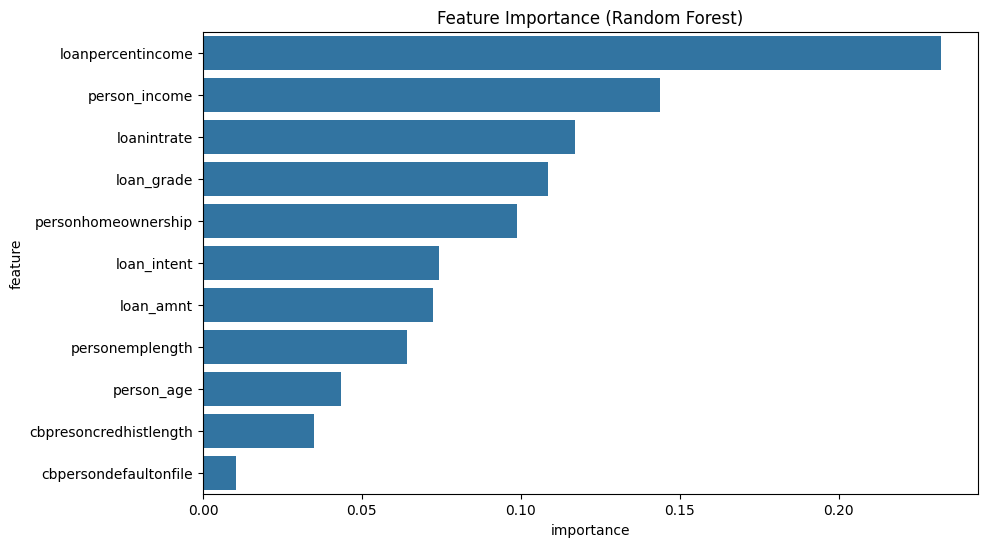


Step 4: Saving trained models...

Example Prediction:
Logistic Regression Probability of Default: 0.17698836668626727
Random Forest Probability of Default: 0.08


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [31]:
# Step 3: Model Training and Evaluation

# Import necessary libraries for modeling
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import pandas as pd

# 1. Train Logistic Regression Model
print("Step 1: Training Logistic Regression Model...")
# Initialize and train the model
lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train_scaled, y_train)

# Make predictions
lr_pred = lr_model.predict(X_test_scaled)
lr_pred_prob = lr_model.predict_proba(X_test_scaled)[:, 1]

# Print results
print("\nLogistic Regression Results:")
print("Accuracy:", accuracy_score(y_test, lr_pred))
print("\nClassification Report:")
print(classification_report(y_test, lr_pred))

# Plot confusion matrix for Logistic Regression
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, lr_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# 2. Train Random Forest Model
print("\nStep 2: Training Random Forest Model...")
# Initialize and train the model
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train_scaled, y_train)

# Make predictions
rf_pred = rf_model.predict(X_test_scaled)
rf_pred_prob = rf_model.predict_proba(X_test_scaled)[:, 1]

# Print results
print("\nRandom Forest Results:")
print("Accuracy:", accuracy_score(y_test, rf_pred))
print("\nClassification Report:")
print(classification_report(y_test, rf_pred))

# Plot confusion matrix for Random Forest
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, rf_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# 3. Feature Importance Analysis for Random Forest
feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': rf_model.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Feature Importance (Random Forest)')
plt.show()

# 4. Save the trained models
print("\nStep 4: Saving trained models...")
models = {
    'logistic_regression': lr_model,
    'random_forest': rf_model
}

with open('trained_models.pkl', 'wb') as f:
    pickle.dump(models, f)

# 5. Create a simple prediction function
def predict_loan_default(input_data):
    """
    Make predictions using both models.
    input_data should be a dictionary with the same features as training data.
    """
    # Load preprocessing objects
    with open('preprocessing_objects.pkl', 'rb') as f:
        preprocessing = pickle.load(f)

    # Prepare input data (make sure it's a DataFrame)
    input_df = pd.DataFrame([input_data])

    # Ensure input data has the same feature names as the training data
    # Use `reindex` to make sure the input data has all columns from X_train
    input_df = input_df.reindex(columns=X_train.columns, fill_value=0)  # Fill missing columns with 0

    # Apply label encoding
    for column, encoder in preprocessing['label_encoders'].items():
        if column in input_df.columns:
            input_df[column] = encoder.transform(input_df[column])

    # Scale features using the same scaler that was used during training
    input_scaled = preprocessing['scaler'].transform(input_df)

    # Make predictions
    lr_prediction = lr_model.predict_proba(input_scaled)[0][1]
    rf_prediction = rf_model.predict_proba(input_scaled)[0][1]

    return {
        'logistic_regression_probability': lr_prediction,
        'random_forest_probability': rf_prediction
    }

# Example of how to use the prediction function
example_input = {
    'person_age': 25,
    'person_income': 50000,
    'personhomeownership': 'RENT',
    'personemplength': 5,
    'loan_intent': 'PERSONAL',
    'loan_grade': 'B',
    'loan_amnt': 10000,
    'loanintrate': 10.5,
    'loanpercentincome': 0.2,
    'cbpersondefaultonfile': 'N',
    'cbpresoncredhistlength': 3
}

print("\nExample Prediction:")
prediction = predict_loan_default(example_input)
print("Logistic Regression Probability of Default:", prediction['logistic_regression_probability'])
print("Random Forest Probability of Default:", prediction['random_forest_probability'])

In [32]:
# Step 4: Create Prediction Interface

import ipywidgets as widgets
from IPython.display import display, clear_output
import pandas as pd
import numpy as np
import pickle  # Make sure pickle is imported for loading models

def create_prediction_interface():
    # Create input widgets for all features
    person_age = widgets.IntText(description='Age:', min=18, max=120)
    person_income = widgets.IntText(description='Income ($):', min=0)
    personhomeownership = widgets.Dropdown(
        options=['RENT', 'OWN', 'MORTGAGE'],
        description='Home Owner:',
        value='RENT'
    )
    personemplength = widgets.FloatText(description='Emp Length:', min=0)
    loan_intent = widgets.Dropdown(
        options=['PERSONAL', 'EDUCATION', 'MEDICAL', 'VENTURE', 'HOMEIMPROVEMENT', 'DEBTCONSOLIDATION'],
        description='Loan Intent:',
        value='PERSONAL'
    )
    loan_grade = widgets.Dropdown(
        options=['A', 'B', 'C', 'D', 'E', 'F', 'G'],
        description='Loan Grade:',
        value='A'
    )
    loan_amnt = widgets.FloatText(description='Loan Amt ($):', min=0)
    loanintrate = widgets.FloatText(description='Interest (%):', min=0, max=100)
    loanpercentincome = widgets.FloatText(description='% of Income:', min=0, max=100)
    cbpersondefaultonfile = widgets.Dropdown(
        options=['Y', 'N'],
        description='Past Default:',
        value='N'
    )
    cbpresoncredhistlength = widgets.FloatText(description='Credit Hist:', min=0)

    # Create prediction button
    predict_button = widgets.Button(description='Predict Default Risk')
    output = widgets.Output()

    def on_predict_button_clicked(b):
        with output:
            clear_output()

            # Collect all inputs into a dictionary
            input_data = {
                'person_age': person_age.value,
                'person_income': person_income.value,
                'personhomeownership': personhomeownership.value,
                'personemplength': personemplength.value,
                'loan_intent': loan_intent.value,
                'loan_grade': loan_grade.value,
                'loan_amnt': loan_amnt.value,
                'loanintrate': loanintrate.value,
                'loanpercentincome': loanpercentincome.value,
                'cbpersondefaultonfile': cbpersondefaultonfile.value,
                'cbpresoncredhistlength': cbpresoncredhistlength.value
            }

            # Validate inputs
            if any(value == 0 or value is None for value in input_data.values()):
                print("❌ Error: All fields must be filled out")
                return

            # Create DataFrame with single row of input data
            input_df = pd.DataFrame([input_data])

            # Load preprocessing objects
            with open('preprocessing_objects.pkl', 'rb') as f:
                preprocessing = pickle.load(f)

            # Apply preprocessing
            for column, encoder in preprocessing['label_encoders'].items():
                if column in input_df.columns:
                    input_df[column] = encoder.transform(input_df[column])

            # Scale features
            input_scaled = preprocessing['scaler'].transform(input_df)

            # Ensure that the input_scaled has column names matching the training data
            input_scaled = pd.DataFrame(input_scaled, columns=input_df.columns)

            # Load models
            with open('/content/trained_models.pkl', 'rb') as f:
                models = pickle.load(f)

            # Make predictions
            lr_prob = models['logistic_regression'].predict_proba(input_scaled)[0][1]
            rf_prob = models['random_forest'].predict_proba(input_scaled)[0][1]

            # Display results
            print("\n🎯 Prediction Results:")
            print("-" * 50)
            print(f"Logistic Regression Default Probability: {lr_prob:.1%}")
            print(f"Random Forest Default Probability: {rf_prob:.1%}")
            print("-" * 50)

            # Risk assessment
            avg_prob = (lr_prob + rf_prob) / 2
            if avg_prob < 0.3:
                print("Risk Assessment: 🟢 Low Risk")
            elif avg_prob < 0.7:
                print("Risk Assessment: 🟡 Medium Risk")
            else:
                print("Risk Assessment: 🔴 High Risk")

            # Feature importance analysis for this prediction
            if avg_prob > 0.5:
                print("\n⚠️ Key Risk Factors:")
                feature_importance = pd.DataFrame({
                    'feature': input_df.columns,
                    'value': input_df.values[0],
                    'importance': models['random_forest'].feature_importances_
                })
                feature_importance = feature_importance.sort_values('importance', ascending=False)
                for _, row in feature_importance.head(3).iterrows():
                    print(f"- {row['feature']}: {row['value']}")

    # Connect button to function
    predict_button.on_click(on_predict_button_clicked)

    # Create interface layout
    input_widgets = [
        person_age, person_income, personhomeownership, personemplength,
        loan_intent, loan_grade, loan_amnt, loanintrate, loanpercentincome,
        cbpersondefaultonfile, cbpresoncredhistlength
    ]

    # Display all widgets
    print("💼 Loan Default Risk Predictor")
    print("Fill in all fields and click 'Predict Default Risk'")
    print("-" * 50)

    for widget in input_widgets:
        display(widget)
    display(predict_button)
    display(output)

# Create and display the interface
create_prediction_interface()

# Add helper function for making predictions programmatically
def predict_loan_default(input_data):
    """
    Make predictions using both models

    Parameters:
    input_data (dict): Dictionary containing all required features

    Returns:
    dict: Containing predictions from both models
    """
    # Create DataFrame with single row
    input_df = pd.DataFrame([input_data])

    # Load preprocessing objects
    with open('preprocessing_objects.pkl', 'rb') as f:
        preprocessing = pickle.load(f)

    # Apply preprocessing
    for column, encoder in preprocessing['label_encoders'].items():
        if column in input_df.columns:
            input_df[column] = encoder.transform(input_df[column])

    # Scale features
    input_scaled = preprocessing['scaler'].transform(input_df)

    # Ensure that the input_scaled has column names matching the training data
    input_scaled = pd.DataFrame(input_scaled, columns=input_df.columns)

    # Load models
    with open('trained_models.pkl', 'rb') as f:
        models = pickle.load(f)

    # Make predictions
    lr_prob = models['logistic_regression'].predict_proba(input_scaled)[0][1]
    rf_prob = models['random_forest'].predict_proba(input_scaled)[0][1]

    return {
        'logistic_regression_probability': lr_prob,
        'random_forest_probability': rf_prob,
        'average_probability': (lr_prob + rf_prob) / 2
    }

print("\n📋 Example Prediction Using Helper Function:")
print("-" * 50)
example_input = {
    'person_age': 30,
    'person_income': 50000,
    'personhomeownership': 'RENT',
    'personemplength': 5,
    'loan_intent': 'PERSONAL',
    'loan_grade': 'B',
    'loan_amnt': 10000,
    'loanintrate': 10,
    'loanpercentincome': 20,
    'cbpersondefaultonfile': 'N',
    'cbpresoncredhistlength': 10
}
prediction = predict_loan_default(example_input)
print("Logistic Regression Probability:", f"{prediction['logistic_regression_probability']:.1%}")
print("Random Forest Probability:", f"{prediction['random_forest_probability']:.1%}")
print("Average Probability:", f"{prediction['average_probability']:.1%}")

💼 Loan Default Risk Predictor
Fill in all fields and click 'Predict Default Risk'
--------------------------------------------------


IntText(value=0, description='Age:')

IntText(value=0, description='Income ($):')

Dropdown(description='Home Owner:', options=('RENT', 'OWN', 'MORTGAGE'), value='RENT')

FloatText(value=0.0, description='Emp Length:')

Dropdown(description='Loan Intent:', options=('PERSONAL', 'EDUCATION', 'MEDICAL', 'VENTURE', 'HOMEIMPROVEMENT'…

Dropdown(description='Loan Grade:', options=('A', 'B', 'C', 'D', 'E', 'F', 'G'), value='A')

FloatText(value=0.0, description='Loan Amt ($):')

FloatText(value=0.0, description='Interest (%):')

FloatText(value=0.0, description='% of Income:')

Dropdown(description='Past Default:', index=1, options=('Y', 'N'), value='N')

FloatText(value=0.0, description='Credit Hist:')

Button(description='Predict Default Risk', style=ButtonStyle())

Output()


📋 Example Prediction Using Helper Function:
--------------------------------------------------
Logistic Regression Probability: 100.0%
Random Forest Probability: 97.0%
Average Probability: 98.5%
